# Rain in Bergen

<img src="images/bergen.png" style="width: 500px;"/>

Bergen is famous for having a lot of rain. So much so that the Bergen bunad features umbrella-themed silver:

<img src="images/bergen-solv.png" style="width: 400px;"/>

To practise ``get`` requests, ``json`` and plotting, we are going to make a bar plot of the rain in Bergen by month. To do so, we will access historical data from MET.

## Frost API

The [Frost API](https://frost.met.no/index.html) from MET provides historical weather and climate data of e.g. temperature, precipitation and wind. 

**Step 1**

Check the conditions for using this API.

What rules do they have for using the API?

**Step 2**

Complete the following code snippet so that it gets the precipitation per day in Bergen

You can use the following parameters for the get request

| Key | Value |
| --- | --- | 
| 'sources' | 'SN50540' | 
| 'elements' | 'sum(precipitation_amount P1D)' | 
| 'referencetime' | '2020-01-01/2020-12-31' | 

   
Blindern has the code SN18700

   

In [4]:
import requests
import json

# Insert your own client ID here
client_id = '9c3a6435-0847-42f8-8395-9b4e7ff42f05'

# Define url for the get request
url = 'https://frost.met.no/observations/v0.jsonld'

# Define parameters for the get request (as a dictionary)
parameters = { 'sources': 'SN50540',
               'elements': 'sum(precipitation_amount P1D)',
               'referencetime': '2020-01-01/2020-12-31'
             }

# Issue an HTTP GET request
r = requests.get(url, parameters, auth=(client_id,''))

# Check if the request worked, print out any errors
if r.status_code==200:
    print('Request succeeded')
else: 
    print(f'Uhoh, we got an error, error code is {r.status_code}')

Request succeeded


Let's check the data we received

In [5]:
print(r.json().keys())

dict_keys(['@context', '@type', 'apiVersion', 'license', 'createdAt', 'queryTime', 'currentItemCount', 'itemsPerPage', 'offset', 'totalItemCount', 'currentLink', 'data'])


We probably want the data

In [6]:
print('The data is in the form of a: ' + str(type(r.json()['data'])))

The data is in the form of a: <class 'list'>


**Step 3:**

Parse through the data. Make a dictionary of the total rain by month. 

In [7]:
prec_per_month = {}

data = r.json()['data']

for i in range(len(data)):

    month = int(r.json()['data'][i]['referenceTime'][5:7])
    prec = r.json()['data'][i]['observations'][0]['value']
    
    if month in prec_per_month: 
        prec_per_month[month] += prec
    else:
        prec_per_month[month] = prec

tot_prec = prec_per_month.values()
months = prec_per_month.keys()


In [8]:
prec_per_month

{1: 469.2,
 2: 334.1,
 3: 257.5,
 4: 173.10000000000002,
 5: 114.6,
 6: 46.0,
 7: 222.79999999999993,
 8: 171.70000000000002,
 9: 383.2,
 10: 188.10000000000002,
 11: 480.5999999999999,
 12: 210.5}

Next we want to plot this data in a bar plot. 

To do this we use pyplot:

## Pyplot

In pyplot, the *figure* (an instance of the class ``plt.Figure``) can be thought of as a single container that contains all the objects representing axes, graphics, text and labels. The *axes* (an instance of the class ``plt.axes``) is more or less what is shown above: a bounding box with ticks and labels, which we will fill with plot elements. 

We want to add a bar plot to ``ax``

**Step 4**

Make a bar plot showing the total precipitation each month. 

<BarContainer object of 12 artists>

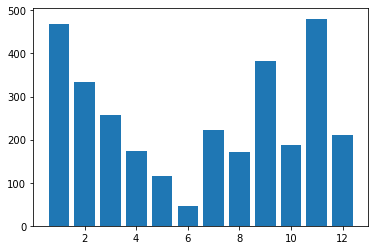

In [10]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes()

months = list(prec_per_month.keys())
height = list(prec_per_month.values())

ax.bar(x= months, height = height)

# You can save the figure to a png
#fig.savefig('rain.png')

**Step 5**

Format the bar plot so that the xticks show the abbreviated month name. 

Tip: Use the calendar package. There you can ask for calendar.month_abbr, which is a list of abbreviations of the month names

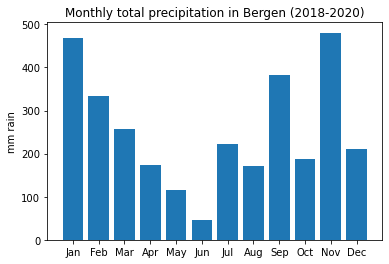

In [11]:

import time
import calendar

xticks = months # this should be a list of xtick values
xtick_vals = [calendar.month_abbr[i] for i in xticks ] # this should be a list of the corresponding xtick labels

ax.set_xticks( xticks )
ax.set_xticklabels(xtick_vals)

ax.set_ylabel('mm rain')
ax.set_title('Monthly total precipitation in Bergen (2018-2020)')
fig

**Step 6**
Check the total rain for different time periods, for example for a 2 year period. Are there any general trends?